# Face Generation


 [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 


<img src='assets/processed_face_data.png' width=60% />

> [here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)


In [1]:
# run this once to unzip the file
#!unzip processed-celeba-small.zip

In [1]:
from glob import glob
from typing import Tuple, Callable, Dict


import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, Resize, RandomHorizontalFlip, RandomRotation, Normalize, ToTensor

import tests

In [2]:
data_dir = 'processed_celeba_small/celeba/'

## Data pipeline

[CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 
[3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images)

### Pre-process and Load the Data

 Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. 30k Images
Building the dataloader. 
* implement the get_transforms function
* create a custom Dataset class that reads the CelebA data

### Exercise: implement the get_transforms function

The `get_transforms` function should output a [`torchvision.transforms.Compose`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose) of different transformations. 
* the function takes a tuple of size as input and should **resize the images** to the input size
* the output images should have values **ranging from -1 to 1**

In [3]:
import multiprocessing

class ModelHyperpar():
    def __init__(self):
        # TRAINING PARAMETERS
        self.batch_size = 128
        
        #starting wit a lr of 0.001 as its usually a perfect startpoint
        self.D_lr = 0.0005
        self.G_lr = 0.0005
        
        self.weight_decay = 0.001
        self.momentum = 0
        self.grad_clip = 1.0
        
        self.beta1 = 0.5
        self.beta2 = 0.999
        self.optim_betas = [self.beta1, self.beta2]
        
        self.min_weight_init_value = -0.5
        self.max_weight_init_value =  0.5
        
        self.epochs = 20
        
        # conv_dim of 64 to initiate
        self.conv_dim = 64
        
        # batch size of 64
        self.batch_size = 64
        
        self.latent_dim = 128

        # DEVICE SETTINGS
        self.num_workers = multiprocessing.cpu_count()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    def initialise_class_weights_in_range(self, seq2seq_class):
        # initialise seq2seq class values between certain range
        for idx, val in seq2seq_class.named_parameters():
            nn.init.uniform_(val.data, self.min_weight_init_value, self.max_weight_init_value)
            
    def train_on_gpu(self) -> bool:
        """Returns True if a CUDA-enabled GPU is available, False otherwise."""
        return torch.cuda.is_available()

    def log_run_values(self):
        print("{:<25}{}".format("Parameter", "Value"))
        print("-" * 35)
        for attr in dir(self):
            if not attr.startswith('__') and not callable(getattr(self, attr)):
                print("{:<25}{}".format(attr, getattr(self, attr)))
                
        
        
m = ModelHyperpar()

In [4]:
def get_transforms(size: Tuple[int, int]) -> Callable:
    """ Transforms to apply to the image."""
    # TODO: edit this function by appending transforms to the below list
    transforms = [
        Resize(size),
        RandomHorizontalFlip(p=0.5),
        ToTensor(),
        Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]
    
    return Compose(transforms)

### Exercise: implement the DatasetDirectory class



In [5]:
import os
from torchvision.io import read_image # gives error due to versions of torch
from PIL import Image

class DatasetDirectory(Dataset):
    """
    A custom dataset class that loads images from folder.
    args:
    - directory: location of the images
    - transform: transform function to apply to the images
    - extension: file format
    """
    def __init__(self, 
                 directory: str, 
                 transforms: Callable = None, 
                 extension: str = '.jpg'):
        # TODO: implement the init method
        self.dir = directory
        self.transforms = transforms
        self.images = []
        for img in os.listdir(self.dir):
            if img.endswith(extension):
                self.images.append(img)

    def __len__(self) -> int:
        """ returns the number of items in the dataset """
        # TODO: return the number of elements in the dataset
        return  len(self.images)

    def __getitem__(self, index: int) -> torch.Tensor:
        """ load an image and apply transformation """
        # TODO: return the index-element of the dataset
        image = Image.open(os.path.join(self.dir, self.images[index])).convert('RGB')
        if self.transforms is not None:
            image = self.transforms(image)
        return image

In [6]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
# run this cell to verify your dataset implementation
dataset = DatasetDirectory(data_dir, get_transforms((64, 64)))
tests.check_dataset_outputs(dataset)

Congrats, your dataset implementation passed all the tests


In [7]:
img = dataset[0].numpy()
print(img.min())

-1.0


The functions below will help you visualize images from the dataset.

 0:: Min:  -1.0, Max: 0.9372549057006836
 1:: Min:  -1.0, Max:   1.0
 2:: Min:  -1.0, Max:   1.0
 3:: Min:  -1.0, Max:   1.0
 4:: Min:  -1.0, Max:   1.0
 5:: Min:  -1.0, Max:   1.0
 6:: Min:  -1.0, Max:   1.0
 7:: Min:  -1.0, Max: 0.9843137264251709
 8:: Min:  -1.0, Max:   1.0
 9:: Min:  -1.0, Max: 0.8196078538894653
10:: Min:  -1.0, Max: 0.9372549057006836
11:: Min:  -1.0, Max: 0.7960784435272217
12:: Min:  -1.0, Max: 0.8039215803146362
13:: Min:  -1.0, Max:   1.0
14:: Min:  -1.0, Max: 0.7803921699523926
15:: Min:  -1.0, Max: 0.9607843160629272
16:: Min:  -1.0, Max: 0.9529411792755127
17:: Min:  -1.0, Max:   1.0
18:: Min:  -1.0, Max:   1.0
19:: Min:  -1.0, Max: 0.8274509906768799


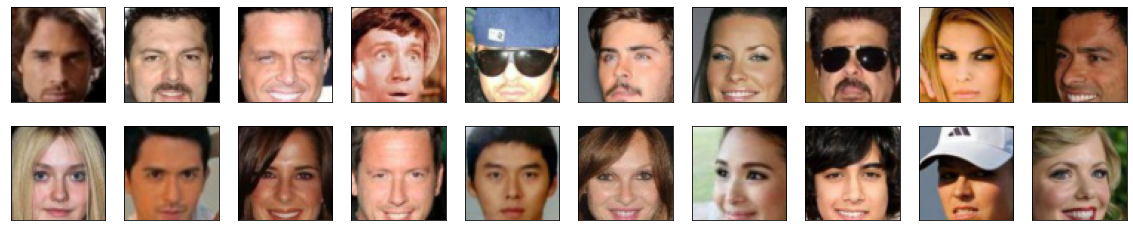

In [8]:


def denormalize(images):
    """Transform images from [-1.0, 1.0] to [0, 255] and cast them to uint8."""
    return ((images + 1.) / 2. * 255).astype(np.uint8)

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, int(plot_size/2), idx+1, xticks=[], yticks=[])
    img = dataset[idx].numpy()
    print("{:>2}:: Min: {:>5}, Max: {:>5}".format(idx, img.min(), img.max()))
    img = np.transpose(img, (1, 2, 0))
    img = denormalize(img)
    ax.imshow(img)

In [9]:
import torch.nn as nn
from torch.nn import Module

In [10]:
class ConvBlock(Module):
    # A convolutional block is made of 3 layers: Conv -> BatchNorm -> Activation.
    def __init__(self, in_channels: int, 
                 out_channels: int, 
                 kernel_size: int = 4, 
                 stride: int = 2, 
                 padding: int = 1, 
                 batch_norm: bool = True):
        
        super(ConvBlock, self).__init__()
        
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        
        # allows first layer to avoid batchnorm 
        self.batch_norm = batch_norm
        if self.batch_norm:
            self.bn = nn.BatchNorm2d(out_channels)
            
        # ReLU function with 0.2x slope for negative input values
        self.activation = nn.LeakyReLU(0.2)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv(x)
        if self.batch_norm:
            x = self.bn(x)
        x = self.activation(x)
        return x

class Discriminator(Module):
    def __init__(self, conv_dim: int = m.conv_dim):
        super(Discriminator, self).__init__()
        # TODO: instantiate the different layers
        
        self.conv_dim = conv_dim

        # 64*64*3 --> 32*32*conv_dim
        self.conv1 = ConvBlock(3, conv_dim, batch_norm=False) # first layer, no batch_norm
        # output size: (batch_size, conv_dim, 32, 32)

        # 32*32*conv_dim --> 16*16*conv_dim*2
        self.conv2 = ConvBlock(conv_dim, conv_dim*2)
        # output size: (batch_size, conv_dim*2, 16, 16)

        # 16*16*conv_dim*2 --> 8*8*conv_dim*4
        self.conv3 = ConvBlock(conv_dim*2, conv_dim*4)
        # output size: (batch_size, conv_dim*4, 8, 8)

        # 8*8*conv_dim*8 --> 4*4*conv_dim*8
        self.conv4 = ConvBlock(conv_dim*4, conv_dim*8)
        # output size: (batch_size, conv_dim*8, 4, 4)

        self.flatten = nn.Flatten()
        # output size: (batch_size, conv_dim*8*4*4)

        self.fc = nn.Linear(conv_dim*8*4*4, 1)
        # output size: (batch_size, 1)
        
        self.activation = nn.Sigmoid()
        
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # TODO: implement the forward method
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
       
        x = self.flatten(x)
        x = self.fc(x)
        x = x[:,None,None, :]
        return x

In [11]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
# run this cell to check your discriminator implementation
discriminator = Discriminator(m.conv_dim)
tests.check_discriminator(discriminator)

Congrats, your discriminator implementation passed all the tests


In [12]:
class DeconvBlock(nn.Module):
    def __init__(self, 
                 in_channels: int, 
                 out_channels: int, 
                 kernel_size: int = 4, 
                 stride: int = 2,
                 padding: int = 1,
                 batch_norm: bool = True):
        
        super(DeconvBlock, self).__init__()
        
        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        
        # allow non batch norm layers
        self.batch_norm = batch_norm
        if self.batch_norm:
            self.bn = nn.BatchNorm2d(out_channels)
        self.activation = nn.ReLU()
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.deconv(x)
        if self.batch_norm:
            x = self.bn(x)
        x = self.activation(x)
        return x
    
class Generator(Module):
    def __init__(self, latent_dim: int, conv_dim: int = m.conv_dim):
        # TODO: instantiate the different layers
        super(Generator, self).__init__()
        
        # input size: (batch_size, latent_dim, 1, 1)
        self.deconv1 = DeconvBlock(latent_dim, conv_dim*8, stride=1, padding=0)
        # output size: (batch_size, conv_dim*8, 4, 4)

        self.deconv2 = DeconvBlock(conv_dim*8, conv_dim*4)
        # output size: (batch_size, conv_dim*4, 8, 8)

        self.deconv3 = DeconvBlock(conv_dim*4, conv_dim*2)
        # output size: (batch_size, conv_dim*2, 16, 16)

        self.deconv4 = DeconvBlock(conv_dim*2, conv_dim, batch_norm=True)
        # output size: (batch_size, conv_dim, 32, 32)

        self.Transp2d = torch.nn.ConvTranspose2d(conv_dim, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        # output size: (batch_size, 3, 64, 64)
        
        self.activation = nn.Tanh()
        
    def forward(self, x):
        # TODO: implement the forward method
        
        x = self.deconv1(x)
        x = self.deconv2(x)
        x = self.deconv3(x)
        x = self.deconv4(x)
        
        x = self.Transp2d(x)
        x = self.activation(x)
        return x
    
    #print('\n'.join(str(x) for x in [f"{i}: {process[i]}" for i in range(len(process))]))

In [13]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
# run this cell to verify your generator implementation
latent_dim = 128
generator = Generator(latent_dim)
#generator.apply(weights_init)
tests.check_generator(generator, latent_dim)

Congrats, your generator implementation passed all the tests


In [14]:
import torch.optim as optim


def create_optimizers(generator: nn.Module, discriminator: nn.Module):
    """ This function should return the optimizers of the generator and the discriminator """
    # TODO: implement the generator and discriminator optimizers
    d_optimizer = optim.Adam(discriminator.parameters(), m.D_lr, m.optim_betas)
    g_optimizer = optim.Adam(generator.parameters(), m.G_lr, m.optim_betas)
    return g_optimizer, d_optimizer

In [15]:
# These are the two losses that will be used by both generator and Discriminator. Real uses 1s and Fake uses 0s

def real_loss(D_out, smooth=False):
    
    loss = torch.mean((D_out-1)**2)
    return loss
    
    """
    batch_size = D_out.size(0)
    
    # label smoothing
    if smooth:
        # smooth labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        # real labels = 1
        labels = torch.ones(batch_size) 
        
    # move labels to GPU if available     
    if m.train_on_gpu():
        labels = labels.cuda()
        
    # binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    
    # loss
    loss = criterion(D_out.squeeze(), labels)
    return loss
    """

def fake_loss(D_out):
    
    loss = torch.mean(D_out**2)
    return loss
    
    """
    batch_size = D_out.size(0)
    
    # fake labels = 0
    labels = torch.zeros(batch_size) 
    
    # move labels to GPU if available
    if m.train_on_gpu():
        labels = labels.cuda()
        
    # binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    
    # loss
    loss = criterion(D_out.squeeze(), labels)
    return loss
    """

In [16]:
# geerator loss is real loss with inputs of fake images to counter balance dicriminator work -- aiming for equilibirum
def generator_loss(fake_logits):
    """ Generator loss, takes the fake scores as inputs. """  
    loss = real_loss(fake_logits) # hence fake images loss but fipping labels (1's)
    return loss

In [17]:
# discriminator needs to train on both fake and real images so it will use both premade losses with corresponding inputs
def discriminator_loss(real_logits, fake_logits):
    """ Discriminator loss, takes the fake and real logits as inputs. """
    d_real_loss = real_loss(real_logits) # real images with real loss
    d_fake_loss = fake_loss(fake_logits) # fake images with fake loss
    loss = d_real_loss + d_fake_loss # total loss (+)
    return loss

In [18]:
def gradient_penalty(discriminator, real_samples, fake_samples):
    """ This function enforces """
    gp = 0
    # TODO (Optional): implement the gradient penalty
    return gp

In [19]:

def generator_step(batch_size: int, latent_dim: int) -> Dict:
    """ One training step of the generator. """
    # TODO: implement the generator step (foward pass, loss calculation and backward pass)
    g_optimizer.zero_grad()
    
    # forward pass
    z = np.random.uniform(-1, 1, size=(batch_size, latent_dim, 1, 1))
    z = torch.from_numpy(z).float()
    # move to GPU if available
    # if m.train_on_gpu(): speed up training
    z = z.cuda()
    #create fake images
    fake_images = generator(z)
    
    # discriminator forward prop (flipped labels in loss)
    D_fake = discriminator(fake_images)
    
    # loss calculation
    g_loss = generator_loss(D_fake)
    
    # backward pass
    g_loss.backward()
    g_optimizer.step()
    
    return {'loss': g_loss}



def discriminator_step(batch_size: int, latent_dim: int, real_images: torch.Tensor) -> Dict:
    """ One training step of the discriminator. """
    # TODO: implement the discriminator step (foward pass, loss calculation and backward pass)
    d_optimizer.zero_grad()
    
    # move to GPU if available
    #if m.train_on_gpu(): speed up training
    real_images = real_images.cuda()
        
    # forward prop with real images
    D_real = discriminator(real_images)
    
    z = np.random.uniform(-1, 1, size=(batch_size, latent_dim, 1, 1))
    z = torch.from_numpy(z).float()
    
    # move to GPU if available
    # if m.train_on_gpu(): speed up training
    z = z.cuda()
        
    # create fake images
    fake_images = generator(z)
    
    # forward prop with fake images
    D_fake = discriminator(fake_images.detach())  # detach to forget computational graph of generator and make sure 
                                                  # backpropogation only follows discriminator
    
    # loss calculation
    d_loss = discriminator_loss(D_real, D_fake)
    
    # backpropogation
    d_loss.backward()
    d_optimizer.step()
    
    # to integrate in case of mode collapse or other arising problems
    
    return {'loss': d_loss}

In [20]:
from datetime import datetime

In [21]:
# you can experiment with different dimensions of latent spaces
m.latent_dim = 128

# update to cpu if you do not have access to a gpu
device = 'cuda'

# number of epochs to train your model
m.epochs = 20

# number of images in each batch
m.batch_size = 64

m.conv_dim = 128

m.D_lr = 0.0002
m.G_lr = 0.0002




In [22]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
print_every = 250




# Create optimizers for the discriminator D and generator G
generator = Generator(m.latent_dim).to(device)
discriminator = Discriminator(m.conv_dim).to(device)
g_optimizer, d_optimizer = create_optimizers(generator, discriminator)

dataloader = DataLoader(dataset, 
                        batch_size=m.batch_size, 
                        shuffle=True, 
                        num_workers=m.num_workers, 
                        drop_last=True,
                        pin_memory=False)
                        

In [23]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""

def display(fixed_latent_vector: torch.Tensor):
    """ helper function to display images during training """
    fig = plt.figure(figsize=(14, 4))
    plot_size = 16
    for idx in np.arange(plot_size):
        ax = fig.add_subplot(2, int(plot_size/2), idx+1, xticks=[], yticks=[])
        img = fixed_latent_vector[idx, ...].detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = denormalize(img)
        ax.imshow(img)
    plt.show()

In [24]:
def save_models(e):
    torch.save(discriminator.state_dict(), "checkpoints/MSE_GENERATOR{}.pt".format(e))
    torch.save(generator.state_dict(), "checkpoints/MSE_DISCRIMINATOR{}.pt".format(e))

In [25]:
m.log_run_values()

Parameter                Value
-----------------------------------
D_lr                     0.0002
G_lr                     0.0002
batch_size               64
beta1                    0.5
beta2                    0.999
conv_dim                 128
device                   cuda
epochs                   20
grad_clip                1.0
latent_dim               128
max_weight_init_value    0.5
min_weight_init_value    -0.5
momentum                 0
num_workers              4
optim_betas              [0.5, 0.999]
weight_decay             0.001


In [26]:
def weights_init(m):
    classname = m.__class__.__name__
    if hasattr(m, 'weight') and classname.find('Conv') != -1:
        nn.init.uniform_(m.weight.data, -0.05, 0.05)
        if hasattr(m, 'bias') and m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)

        
generator.apply(weights_init)
discriminator.apply(weights_init)

Discriminator(
  (conv1): ConvBlock(
    (conv): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (activation): LeakyReLU(negative_slope=0.2)
  )
  (conv2): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.2)
  )
  (conv3): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.2)
  )
  (conv4): ConvBlock(
    (conv): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.2)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  

2023-03-13 20:50:18 | Epoch [1/20] | Batch 0/509 | d_loss: 15.9845 | g_loss: 0.7250
2023-03-13 20:57:03 | Epoch [1/20] | Batch 250/509 | d_loss: 0.5494 | g_loss: 0.4579
2023-03-13 21:03:48 | Epoch [1/20] | Batch 500/509 | d_loss: 0.6287 | g_loss: 0.4042


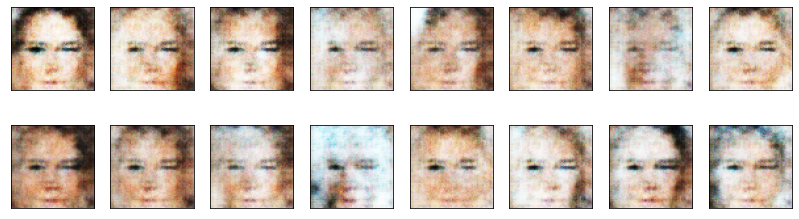

2023-03-13 21:04:04 | Epoch [2/20] | Batch 0/509 | d_loss: 0.9341 | g_loss: 0.7768
2023-03-13 21:10:49 | Epoch [2/20] | Batch 250/509 | d_loss: 0.6734 | g_loss: 0.2100
2023-03-13 21:17:34 | Epoch [2/20] | Batch 500/509 | d_loss: 0.7797 | g_loss: 0.3261


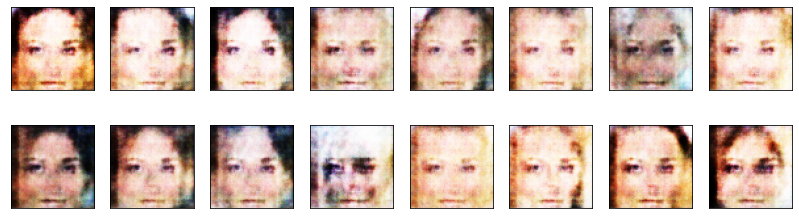

2023-03-13 21:17:50 | Epoch [3/20] | Batch 0/509 | d_loss: 0.7316 | g_loss: 0.2718
2023-03-13 21:24:35 | Epoch [3/20] | Batch 250/509 | d_loss: 0.6995 | g_loss: 0.3387
2023-03-13 21:31:20 | Epoch [3/20] | Batch 500/509 | d_loss: 0.7151 | g_loss: 0.1323


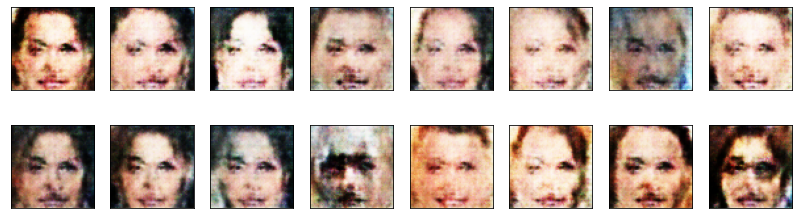

2023-03-13 21:31:36 | Epoch [4/20] | Batch 0/509 | d_loss: 0.6422 | g_loss: 0.1921
2023-03-13 21:38:21 | Epoch [4/20] | Batch 250/509 | d_loss: 0.6057 | g_loss: 0.3158
2023-03-13 21:45:06 | Epoch [4/20] | Batch 500/509 | d_loss: 0.8375 | g_loss: 0.0493


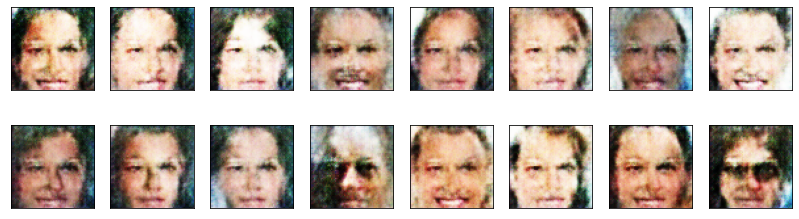

2023-03-13 21:45:22 | Epoch [5/20] | Batch 0/509 | d_loss: 0.7263 | g_loss: 0.1692
2023-03-13 21:52:07 | Epoch [5/20] | Batch 250/509 | d_loss: 1.0119 | g_loss: 0.6325
2023-03-13 21:58:52 | Epoch [5/20] | Batch 500/509 | d_loss: 0.5707 | g_loss: 0.2056


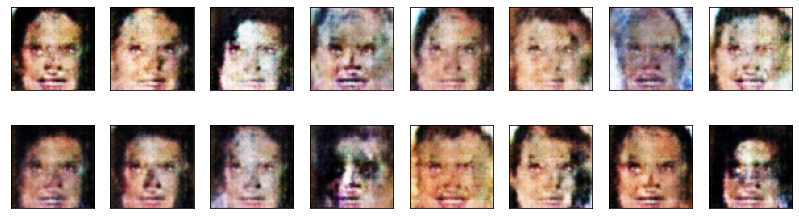

2023-03-13 21:59:07 | Epoch [6/20] | Batch 0/509 | d_loss: 0.7946 | g_loss: 0.4579
2023-03-13 22:05:52 | Epoch [6/20] | Batch 250/509 | d_loss: 0.5906 | g_loss: 0.2872
2023-03-13 22:12:37 | Epoch [6/20] | Batch 500/509 | d_loss: 0.6354 | g_loss: 0.3088


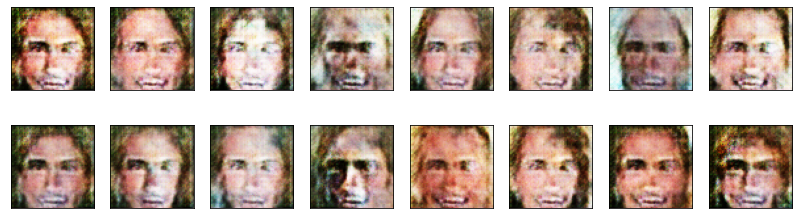

2023-03-13 22:12:53 | Epoch [7/20] | Batch 0/509 | d_loss: 0.6961 | g_loss: 0.1834
2023-03-13 22:19:37 | Epoch [7/20] | Batch 250/509 | d_loss: 0.5813 | g_loss: 0.3108
2023-03-13 22:26:22 | Epoch [7/20] | Batch 500/509 | d_loss: 0.6646 | g_loss: 0.1549


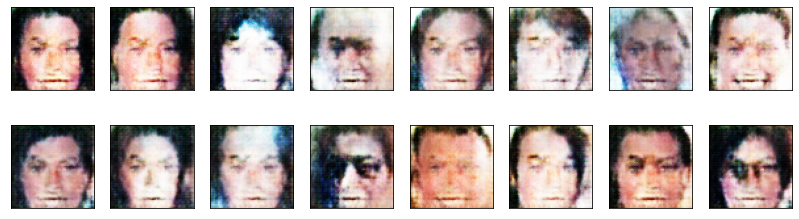

2023-03-13 22:26:38 | Epoch [8/20] | Batch 0/509 | d_loss: 0.9379 | g_loss: 0.0472
2023-03-13 22:33:22 | Epoch [8/20] | Batch 250/509 | d_loss: 0.5828 | g_loss: 0.3178
2023-03-13 22:40:07 | Epoch [8/20] | Batch 500/509 | d_loss: 0.7350 | g_loss: 0.2158


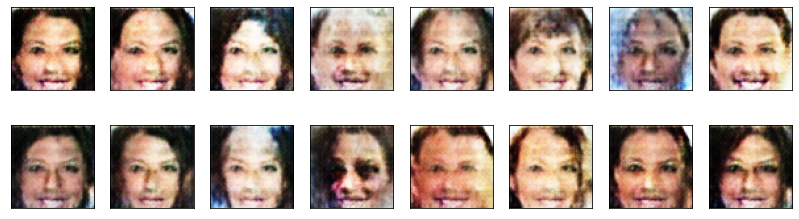

2023-03-13 22:40:22 | Epoch [9/20] | Batch 0/509 | d_loss: 0.5785 | g_loss: 0.2600
2023-03-13 22:47:07 | Epoch [9/20] | Batch 250/509 | d_loss: 0.5513 | g_loss: 0.1746
2023-03-13 22:53:51 | Epoch [9/20] | Batch 500/509 | d_loss: 0.5895 | g_loss: 0.2511


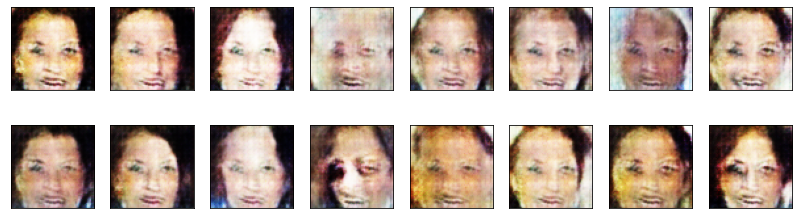

2023-03-13 22:54:07 | Epoch [10/20] | Batch 0/509 | d_loss: 0.5933 | g_loss: 0.4218
2023-03-13 23:00:51 | Epoch [10/20] | Batch 250/509 | d_loss: 0.5361 | g_loss: 0.2625
2023-03-13 23:07:35 | Epoch [10/20] | Batch 500/509 | d_loss: 0.5368 | g_loss: 0.3229


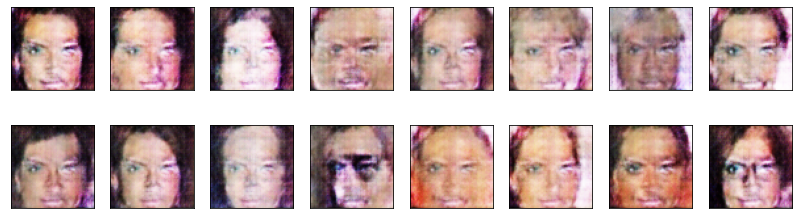

2023-03-13 23:07:51 | Epoch [11/20] | Batch 0/509 | d_loss: 0.5777 | g_loss: 0.1672
2023-03-13 23:14:35 | Epoch [11/20] | Batch 250/509 | d_loss: 0.5236 | g_loss: 0.3018
2023-03-13 23:21:20 | Epoch [11/20] | Batch 500/509 | d_loss: 0.5584 | g_loss: 0.1781


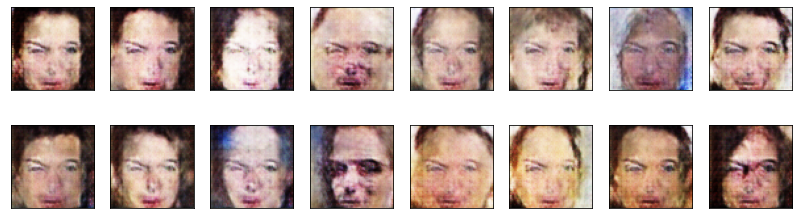

2023-03-13 23:21:35 | Epoch [12/20] | Batch 0/509 | d_loss: 0.5526 | g_loss: 0.3050
2023-03-13 23:28:19 | Epoch [12/20] | Batch 250/509 | d_loss: 0.6462 | g_loss: 0.2232
2023-03-13 23:35:03 | Epoch [12/20] | Batch 500/509 | d_loss: 0.5944 | g_loss: 0.2234


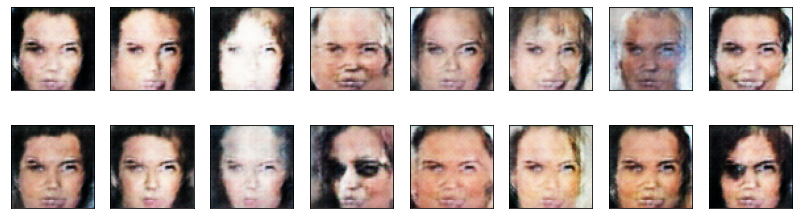

2023-03-13 23:35:19 | Epoch [13/20] | Batch 0/509 | d_loss: 0.5523 | g_loss: 0.1711
2023-03-13 23:42:03 | Epoch [13/20] | Batch 250/509 | d_loss: 0.6299 | g_loss: 0.4303
2023-03-13 23:48:47 | Epoch [13/20] | Batch 500/509 | d_loss: 0.5806 | g_loss: 0.3076


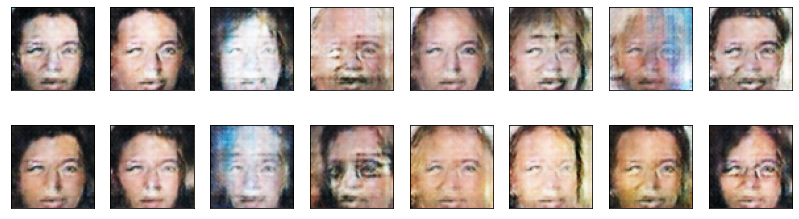

2023-03-13 23:49:03 | Epoch [14/20] | Batch 0/509 | d_loss: 0.5307 | g_loss: 0.2424
2023-03-13 23:55:47 | Epoch [14/20] | Batch 250/509 | d_loss: 0.5483 | g_loss: 0.2158
2023-03-14 00:02:31 | Epoch [14/20] | Batch 500/509 | d_loss: 0.4816 | g_loss: 0.3114


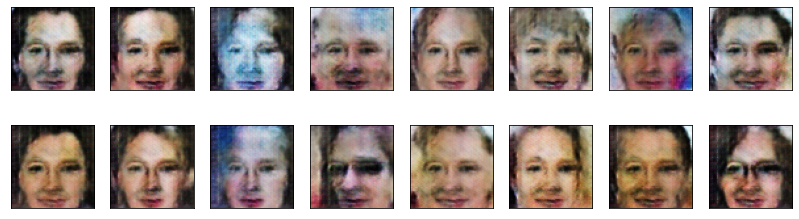

2023-03-14 00:02:47 | Epoch [15/20] | Batch 0/509 | d_loss: 0.6417 | g_loss: 0.1072
2023-03-14 00:09:31 | Epoch [15/20] | Batch 250/509 | d_loss: 0.5252 | g_loss: 0.3604
2023-03-14 00:16:15 | Epoch [15/20] | Batch 500/509 | d_loss: 0.5216 | g_loss: 0.2158


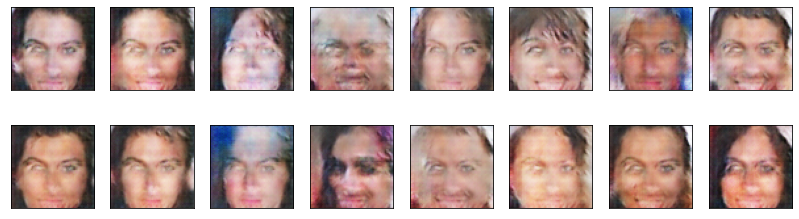

2023-03-14 00:16:30 | Epoch [16/20] | Batch 0/509 | d_loss: 0.5054 | g_loss: 0.2582
2023-03-14 00:23:15 | Epoch [16/20] | Batch 250/509 | d_loss: 0.5270 | g_loss: 0.2326
2023-03-14 00:29:59 | Epoch [16/20] | Batch 500/509 | d_loss: 0.5461 | g_loss: 0.3537


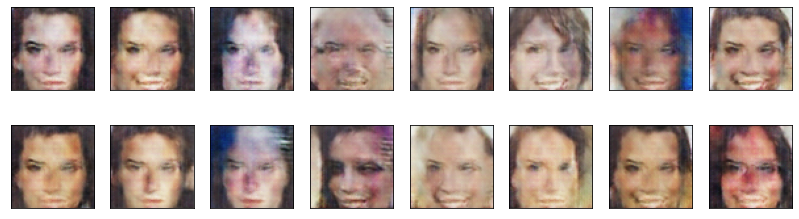

2023-03-14 00:30:14 | Epoch [17/20] | Batch 0/509 | d_loss: 0.4979 | g_loss: 0.2030
2023-03-14 00:36:58 | Epoch [17/20] | Batch 250/509 | d_loss: 0.4891 | g_loss: 0.2400
2023-03-14 00:43:43 | Epoch [17/20] | Batch 500/509 | d_loss: 0.4819 | g_loss: 0.2901


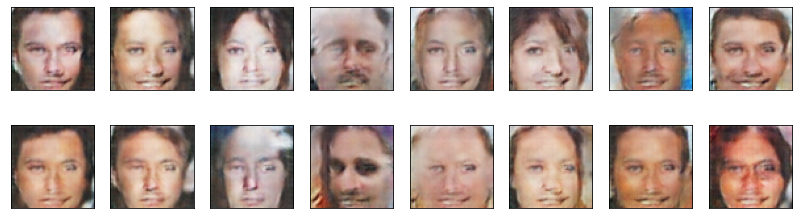

2023-03-14 00:43:58 | Epoch [18/20] | Batch 0/509 | d_loss: 0.5111 | g_loss: 0.2917
2023-03-14 00:50:42 | Epoch [18/20] | Batch 250/509 | d_loss: 0.5134 | g_loss: 0.2811
2023-03-14 00:57:26 | Epoch [18/20] | Batch 500/509 | d_loss: 0.5088 | g_loss: 0.3636


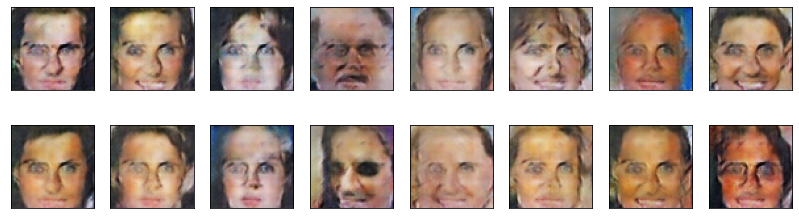

2023-03-14 00:57:42 | Epoch [19/20] | Batch 0/509 | d_loss: 0.4785 | g_loss: 0.3267
2023-03-14 01:04:27 | Epoch [19/20] | Batch 250/509 | d_loss: 0.4162 | g_loss: 0.2070
2023-03-14 01:11:11 | Epoch [19/20] | Batch 500/509 | d_loss: 0.5209 | g_loss: 0.3017


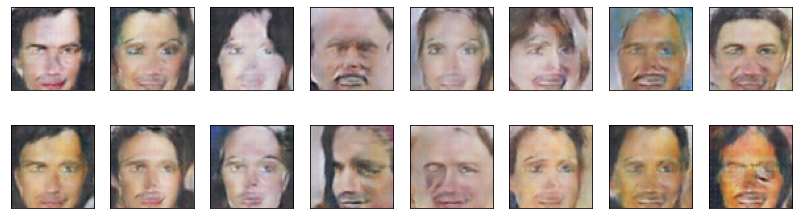

2023-03-14 01:11:27 | Epoch [20/20] | Batch 0/509 | d_loss: 0.5876 | g_loss: 0.3516
2023-03-14 01:18:11 | Epoch [20/20] | Batch 250/509 | d_loss: 0.5484 | g_loss: 0.2315
2023-03-14 01:24:56 | Epoch [20/20] | Batch 500/509 | d_loss: 0.5217 | g_loss: 0.2689


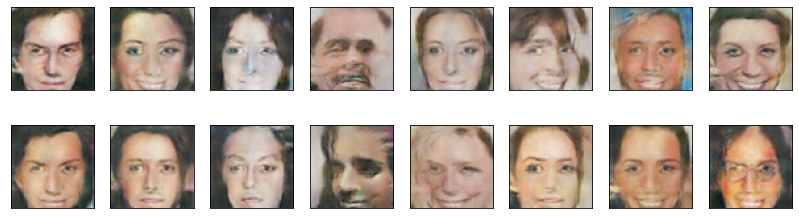

In [28]:
fixed_latent_vector = torch.randn(16, latent_dim, 1, 1).float().cuda()

#ModelName.load_state_dict(torch.load("chekpointName"))

num_generator_steps = 5

losses = []
for epoch in range(m.epochs):
    for batch_i, real_images in enumerate(dataloader):
        real_images = real_images.to(device)

        batch_size = real_images.size(0)

        
        
        
        d_loss=discriminator_step(batch_size, m.latent_dim, real_images)
        
        for _ in range(num_generator_steps):
            g_loss=generator_step(batch_size, m.latent_dim) 

        
        if batch_i % print_every == 0:
            # append discriminator loss and generator loss
            d = d_loss['loss'].item()
            g = g_loss['loss'].item()
            losses.append((d, g))
            # print discriminator and generator loss
            time = str(datetime.now()).split('.')[0]
            print(f'{time} | Epoch [{epoch+1}/{m.epochs}] | Batch {batch_i}/{len(dataloader)} | d_loss: {d:.4f} | g_loss: {g:.4f}')
    
    # display images during training
    generator.eval()
    generated_images = generator(fixed_latent_vector)
    display(generated_images)
    generator.train()
    
    if epoch % 3 == 0:
        save_models(epoch)

### Training losses

Plot the training losses for the generator and discriminator.

In [ ]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result
* Loss functions

**Answer:** The model performance was not necessarily increasing as the numbe of epochs went up, although some epochs seemed to create more diverse range of faces most generations did stick to white faces. MSE seemed to work much better and avoided gradient problems. Finally the total train time was close to 6 hours which was not too good, if i had to try this again I would probably reduce training time by optimizing the stepping functions
Implementation of a lr step function could also be beneficial.

Thank you

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb".  

Submit the notebook using the ***SUBMIT*** button in the bottom right corner of the Project Workspace.

Below are some of the results from my model training

I had to delete the photos beause it would not load with all the printed photos otherwise

Total training time 5 hours 54 min



My first epoch

<img src='Screenshot 2023-03-13 150739.png' width=60% />

Some of the best models
<img src='Screenshot 2023-03-13 145654.png' width=60% />
<img src='Screenshot 2023-03-13 141020.png' width=60% />
<img src='Screenshot 2023-03-13 161613.png' width=60% />

checkpoints were saved every five epochs